In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

## load mnist dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

## get number of labels

In [8]:
num_labels = len(np.unique(y_train))
num_labels

10

## convert to one-hot vector

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(60000, 10)

In [11]:
y_test.shape

(10000, 10)

## input image dimensions

In [12]:
image_size = x_train.shape[1]
print("image_size = " + str(image_size))
input_size = image_size * image_size
print("input_size = " + str(input_size))

image_size = 28
input_size = 784


## resize and normalize

In [13]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [14]:
x_train.shape

(60000, 784)

In [15]:
x_test.shape

(10000, 784)

## network parameters

In [17]:
batch_size = 128
hidden_units = 256
dropout = 0.45

## create model

In [18]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
 
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

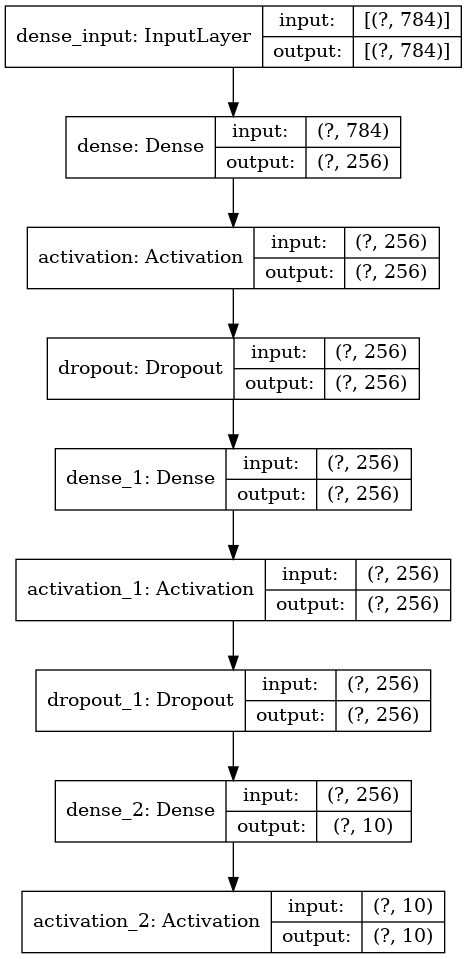

In [19]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='mlp-mnist.png')

## Compile the model

In [20]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## train

In [21]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4256 - accuracy: 0.8699
Epoch 2/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1925 - accuracy: 0.9421
Epoch 3/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1516 - accuracy: 0.9549
Epoch 4/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1269 - accuracy: 0.9608
Epoch 5/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1142 - accuracy: 0.9649
Epoch 6/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1032 - accuracy: 0.9679
Epoch 7/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0938 - accuracy: 0.9710
Epoch 8/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0874 - accuracy: 0.9722
Epoch 9/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0841 - accuracy: 0.9738
Epoch 10/20
6

In [22]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 98.2%


In [23]:
import sklearn.metrics as metrics

y_pred_ohe = model.predict(x_test)   
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  
confusion_matrix

array([[ 972,    1,    2,    0,    0,    1,    2,    1,    1,    0],
       [   0, 1126,    3,    1,    0,    0,    2,    0,    3,    0],
       [   1,    1, 1018,    4,    1,    0,    0,    6,    1,    0],
       [   0,    0,    3, 1000,    0,    2,    0,    3,    1,    1],
       [   2,    0,    1,    0,  967,    0,    4,    2,    2,    4],
       [   3,    0,    0,   11,    1,  871,    3,    0,    2,    1],
       [   3,    3,    0,    1,    3,    4,  943,    0,    1,    0],
       [   1,    3,   10,    2,    0,    0,    0, 1004,    1,    7],
       [   4,    1,    1,    7,    3,    5,    0,    3,  948,    2],
       [   0,    2,    0,   10,   15,    3,    1,    2,    3,  973]])

In [24]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

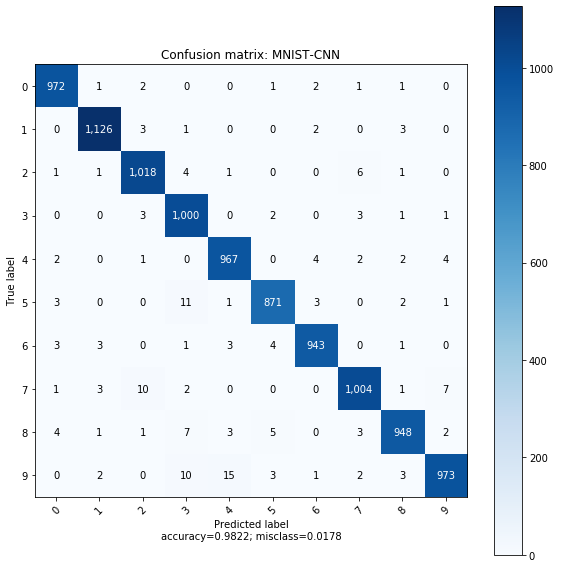

In [25]:
title = 'Confusion matrix: MNIST-CNN'
target_names = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(confusion_matrix, target_names, title=title, cmap=None, normalize=False)